Начнём с выручки — наиболее общего показателя, который покажет, какой доход приносит наш сервис.

Задание:

Для каждого дня в таблице orders рассчитайте следующие показатели:

Выручку, полученную в этот день.
Суммарную выручку на текущий день.
Прирост выручки, полученной в этот день, относительно значения выручки за предыдущий день.
Колонки с показателями назовите соответственно revenue, total_revenue, revenue_change. Колонку с датами назовите date.

Прирост выручки рассчитайте в процентах и округлите значения до двух знаков после запятой.

Результат должен быть отсортирован по возрастанию даты.

Поля в результирующей таблице: date, revenue, total_revenue, revenue_change

```sql
with orders_prices AS (
  SELECT
    date,
    sum(price) AS revenue
  FROM
    (
      SELECT
        unnest_query.date,
        unnest_query.product_id,
        products.price AS price
      FROM
        (
          SELECT
            order_id,
            creation_time :: date AS date,
            unnest(product_ids) AS product_id
          FROM
            orders
        ) AS unnest_query
        JOIN products using (product_id)
      where
        unnest_query.order_id NOT IN (
          SELECT
            order_id
          FROM
            user_actions
          where
            action = 'cancel_order'
        )
    ) AS subq
  GROUP BY
    1
)

SELECT
  *,
  sum(revenue) over(
    ORDER BY
      date
  ) AS total_revenue,
  round(
    (
      revenue :: decimal / lag(revenue, 1) over(
        ORDER BY
          date
      ) * 100 - 100
    ),
    2
  ) AS revenue_change
FROM
  orders_prices
ORDER BY
  1
```

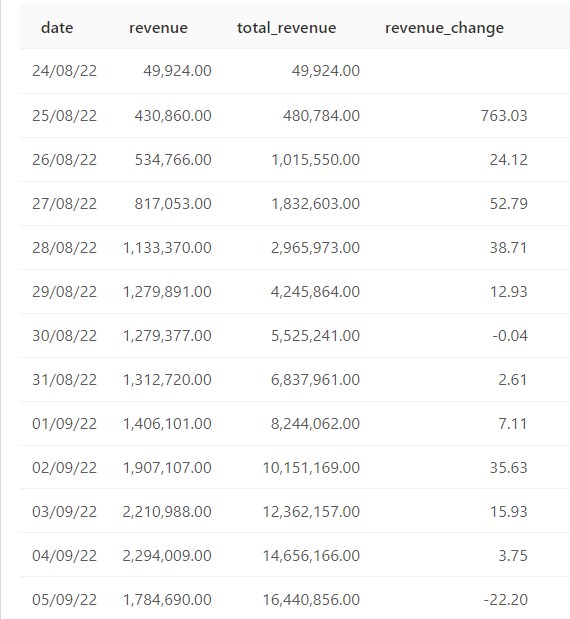

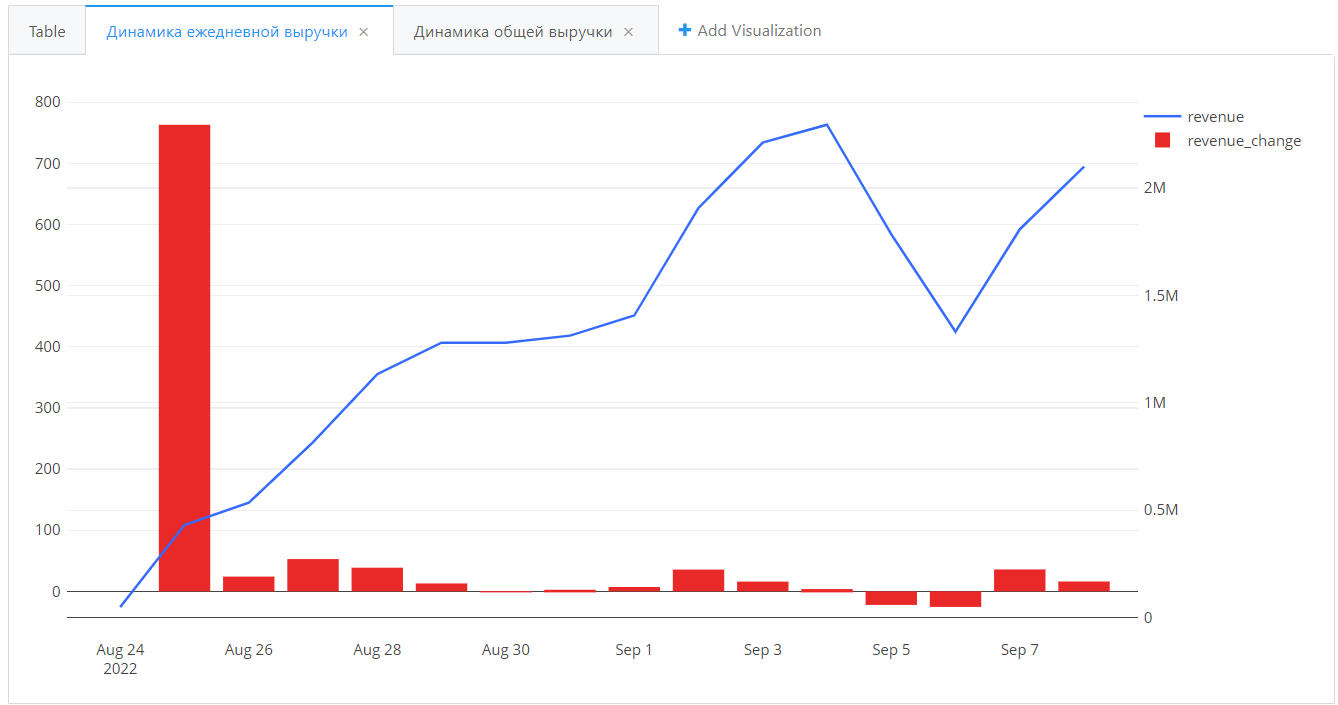

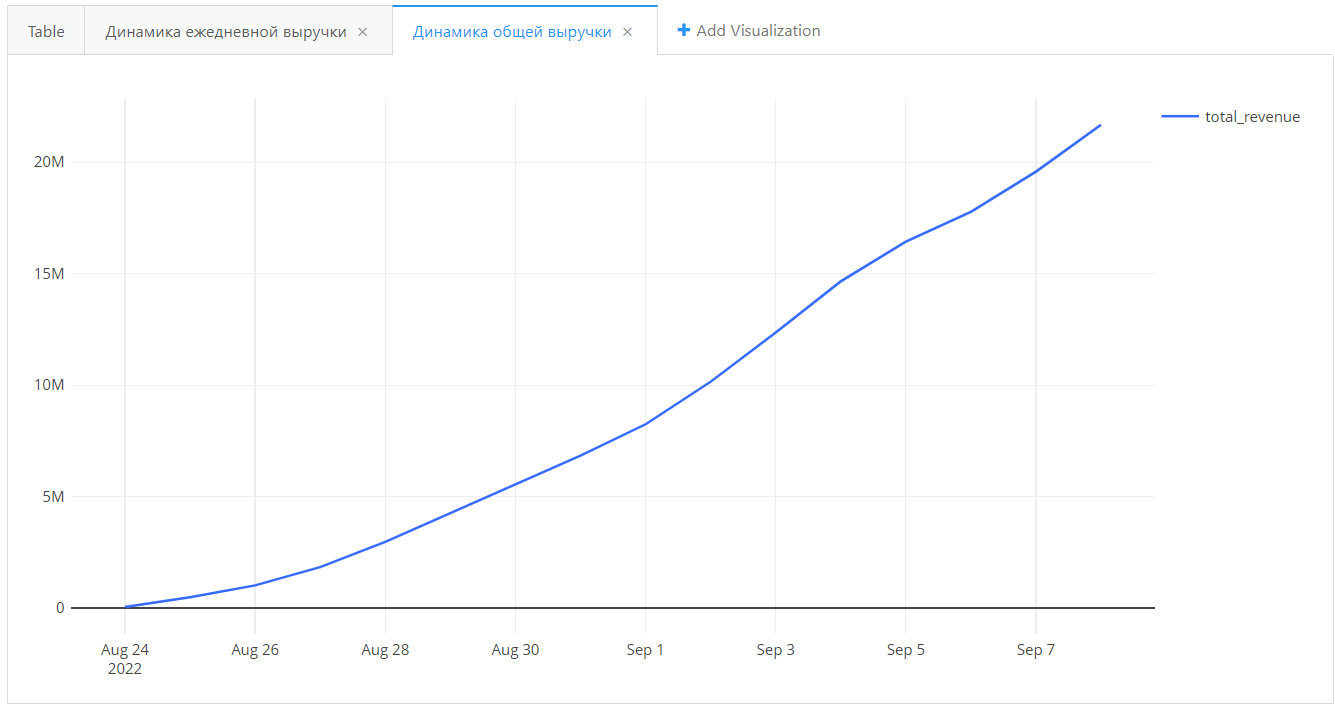